### Метод опорных векторов SVM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy import stats

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.6)
print(X[:5,:])
print(y)

[[1.41281595 1.5303347 ]
 [1.81336135 1.6311307 ]
 [1.43289271 4.37679234]
 [1.87271752 4.18069237]
 [2.09517785 1.0791468 ]]
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


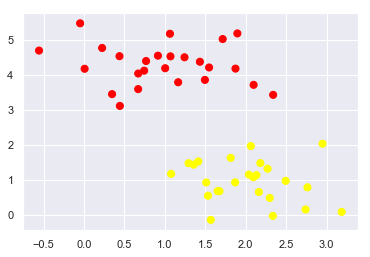

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn');

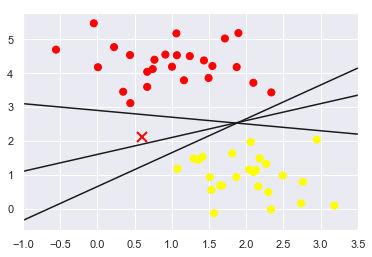

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth = 2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b, '-k')
plt.xlim(-1, 3.5);

##### Максимизируем отступ

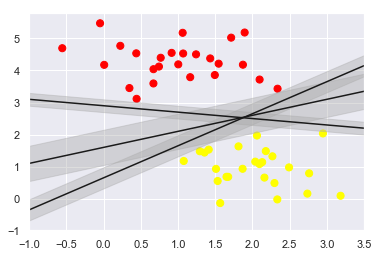

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none',
                    color='#AAAAAA', alpha = 0.4)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b, '-k')
plt.xlim(-1, 3.5);

#### Аппроксимация методом опорных векторов

In [6]:
from sklearn.svm import SVC # классификатор на основе опорных векторов
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Строит график решающей фугкции для 2-мерной SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # создаем коорд сетку для оценки модели
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # рисуем границы принятия решения и отступы
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # рисуем опорные векторы
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

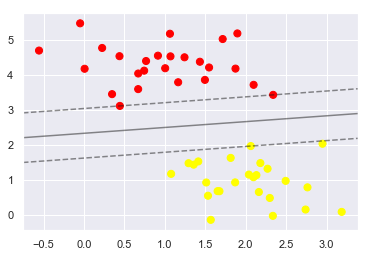

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Новые точки не влияют на модель, если не находятся между разделяющими линиями

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers = 2, 
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C = 1E10)
    model.fit(X,y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    

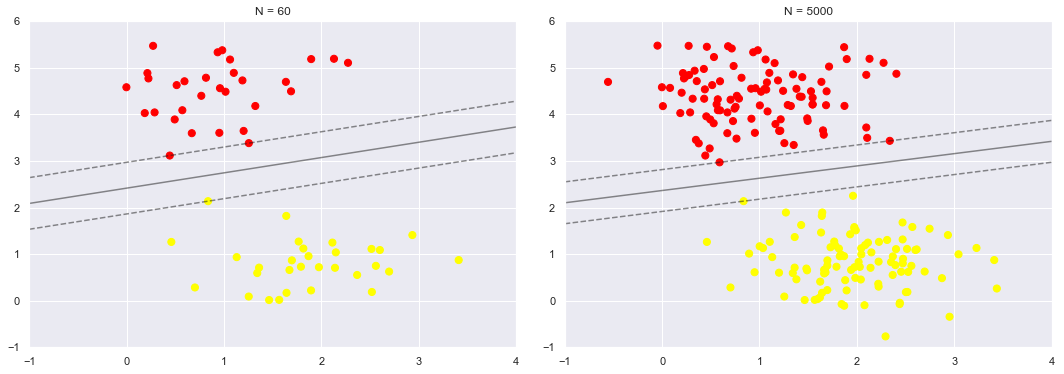

In [11]:
fig, ax = plt.subplots(1, 2, figsize= (16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 5000]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [12]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200, 1000], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200, 1000), value=10), Output()), _dom_classes=('…

#### SVM-ядро

In [13]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X,y)

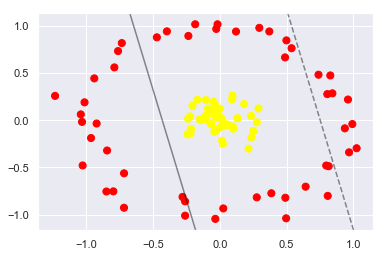

In [14]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [15]:
# одна из подходящих простых проекций — вычисление радиальной базисной функции, центрированной по
# середине совокупности данных

In [16]:
r = np.exp(-(X**2).sum(1))

In [17]:
from mpl_toolkits import mplot3d

In [18]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

In [19]:
interact(plot_3D, elev=(-90, 90), azim=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

In [22]:
# для применения SVM с использованием ядерного преобразования выбираем radial basis function - rbf
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

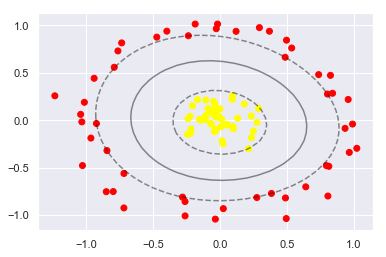

In [30]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
           s=300, lw=1, facecolors='none');

#### Настройка SVM: размытие отступов

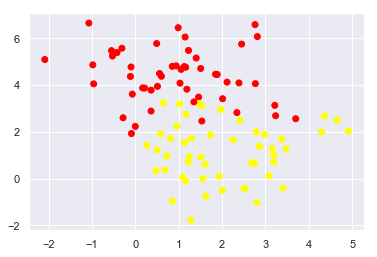

In [31]:
X,y = make_blobs(n_samples=100, centers=2, 
                random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn');

''

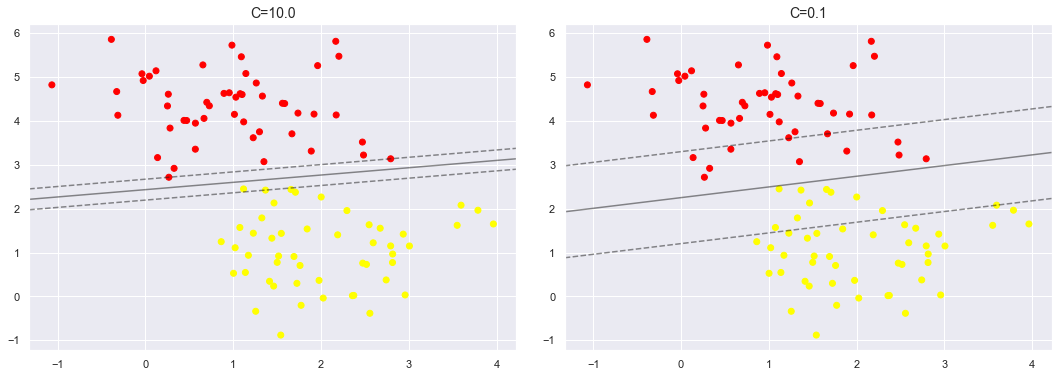

In [35]:
X,y = make_blobs(n_samples=100, centers=2, 
                random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model=SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, lw=1, facecolor='none');
    axi.set_title('C={0:.1f}'.format(C), size=14)
;

#### Пример: распознавание лиц

In [36]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


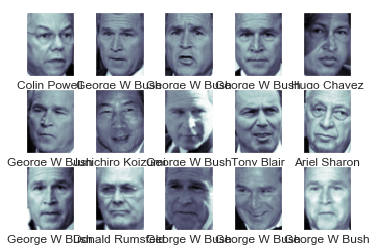

In [37]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])

In [41]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline


In [42]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, 
                                               faces.target,
                                               random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,10,50],
             'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 26.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [50]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [51]:
yfit

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 3, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 3, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 2, 3, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 0, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 7, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 3, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 7, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 4, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 1, 5, 1,

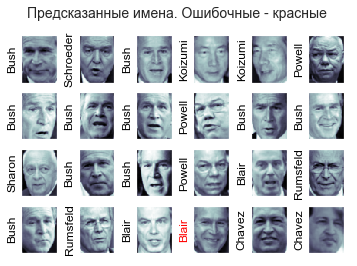

In [52]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Предсказанные имена. Ошибочные - красные', size=14)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, 
                           target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'predicted label')

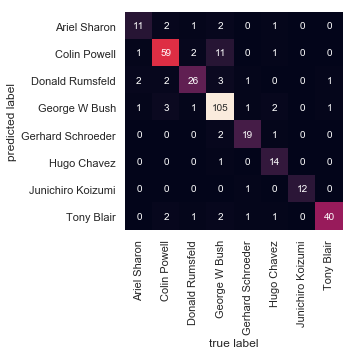

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')